In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
%matplotlib inline

In [121]:
import seaborn as sns
import re
import random
plt.style.use('ggplot')

In [122]:
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
english_stemmer=SnowballStemmer('english')

In [123]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection.univariate_selection import SelectKBest, chi2, f_classif
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [124]:
# Pick randomly 20000 reviews

n = 413000  
s = 20000 
skip = sorted(random.sample(range(1,n),n-s))

#df = pd.read_csv("Amazon_Unlocked_Mobile.csv", skiprows=skip)
df = pd.read_csv("Amazon_Unlocked_Mobile.csv")

In [125]:
df.shape

(413840, 6)

In [126]:
df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [127]:
data= df[['Reviews','Rating']]

In [128]:
data.isnull().any()

Reviews     True
Rating     False
dtype: bool

In [129]:
data.isnull().values.sum()

62

In [130]:
data = data[data['Reviews'].isnull()==False]

In [131]:
#df=df.dropna()
data.shape

(413778, 2)

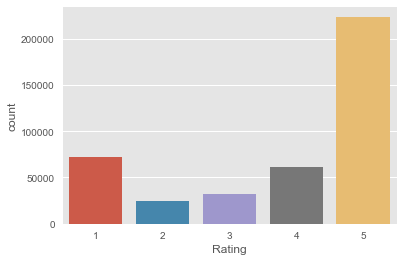

In [132]:
sns.countplot(data['Rating'])

In [133]:
print (data[data['Rating']==5].count())
print (data[data['Rating']<5].count())

Reviews    223580
Rating     223580
dtype: int64
Reviews    190198
Rating     190198
dtype: int64


In [134]:
data.Reviews[0]

"I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!"

In [135]:
# Remove HTML
review_text= BeautifulSoup(data.Reviews[0]).get_text()
print (review_text)

I feel so LUCKY to have found this used (phone to us & not used hard at all), phone on line from someone who upgraded and sold this one. My Son liked his old one that finally fell apart after 2.5+ years and didn't want an upgrade!! Thank you Seller, we really appreciate it & your honesty re: said used phone.I recommend this seller very highly & would but from them again!!


/Users/rajegupt/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/rajegupt/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [136]:
# 2. Remove non-letters
review_text = re.sub("[^a-zA-Z]"," ", review_text)
print (review_text)

I feel so LUCKY to have found this used  phone to us   not used hard at all   phone on line from someone who upgraded and sold this one  My Son liked his old one that finally fell apart after      years and didn t want an upgrade   Thank you Seller  we really appreciate it   your honesty re  said used phone I recommend this seller very highly   would but from them again  


In [137]:
# 3. Convert words to lower case and split them
words = review_text.lower().split()
print (words)

['i', 'feel', 'so', 'lucky', 'to', 'have', 'found', 'this', 'used', 'phone', 'to', 'us', 'not', 'used', 'hard', 'at', 'all', 'phone', 'on', 'line', 'from', 'someone', 'who', 'upgraded', 'and', 'sold', 'this', 'one', 'my', 'son', 'liked', 'his', 'old', 'one', 'that', 'finally', 'fell', 'apart', 'after', 'years', 'and', 'didn', 't', 'want', 'an', 'upgrade', 'thank', 'you', 'seller', 'we', 'really', 'appreciate', 'it', 'your', 'honesty', 're', 'said', 'used', 'phone', 'i', 'recommend', 'this', 'seller', 'very', 'highly', 'would', 'but', 'from', 'them', 'again']


In [138]:
# 4. Remove Stopwords
stops = set(stopwords.words("english"))
words = [w for w in words if not w in stops]

print (stops)
print (" \nwords after removing stopwords\n")
print (words)

{'didn', 'i', 'while', 's', 'your', 'd', 'weren', 'yourself', 'very', 'myself', 'me', 'whom', 'o', 'theirs', 'when', 'with', 'that', 'down', 'themselves', 'not', 're', 'who', 'up', 'other', 'its', 'so', 'y', 'too', 'just', 'further', 'do', 'own', 'the', 'aren', 'or', 'doesn', 'wasn', 'herself', 'itself', 'hadn', 'should', 'of', 'both', 'hers', 'off', 'ourselves', 'him', 'through', 'in', 'ain', 'having', 'to', 'where', 'only', 'by', 'himself', 'no', 'below', 'mightn', 'against', 'under', 'about', 'why', 'which', 'this', 'on', 'them', 'same', 'are', 'into', 'does', 've', 'won', 'm', 'were', 'most', 'from', 'and', 'those', 'nor', 'they', 'because', 'more', 'll', 'some', 'once', 'yourselves', 'such', 'it', 'wouldn', 'being', 'couldn', 'been', 't', 'we', 'after', 'again', 'am', 'she', 'shan', 'my', 'isn', 'over', 'as', 'don', 'doing', 'had', 'than', 'how', 'before', 'yours', 'her', 'but', 'for', 'an', 'was', 'hasn', 'few', 'each', 'our', 'can', 'there', 'during', 'out', 'these', 'be', 'a', 

In [139]:
# 5. Stem the words

stemmer = english_stemmer
b=[]
for word in words:
    b.append(stemmer.stem(word))
print (b)

['feel', 'lucki', 'found', 'use', 'phone', 'us', 'use', 'hard', 'phone', 'line', 'someon', 'upgrad', 'sold', 'one', 'son', 'like', 'old', 'one', 'final', 'fell', 'apart', 'year', 'want', 'upgrad', 'thank', 'seller', 'realli', 'appreci', 'honesti', 'said', 'use', 'phone', 'recommend', 'seller', 'high', 'would']


In [140]:
# Write all the steps in one function now

def review_to_wordlist( review, remove_stopwords=True):
    # Function to convert a document to a sequence of words,
    # optionally removing stop words.  Returns a list of words.
    #
    # 1. Remove HTML
    review_text = BeautifulSoup(review).get_text()

    #
    # 2. Remove non-letters
    review_text = re.sub("[^a-zA-Z]"," ", review_text)
    #
    # 3. Convert words to lower case and split them
    words = review_text.lower().split()
    #
    # 4. Optionally remove stop words (True by default)
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        words = [w for w in words if not w in stops]

    b=[]
    stemmer = english_stemmer #PorterStemmer()
    for word in words:
        b.append(stemmer.stem(word))

    # 5. Return a list of words
    return(b)

In [141]:
train, test = train_test_split(data, test_size = 0.3)

In [142]:
# Clean all the reviews

clean_train_reviews = []
for review in train['Reviews']:
    clean_train_reviews.append( " ".join(review_to_wordlist(review)))
    
clean_test_reviews = []
for review in test['Reviews']:
    clean_test_reviews.append( " ".join(review_to_wordlist(review)))

/Users/rajegupt/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/rajegupt/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))
/Users/rajegupt/anaconda3/lib/python3.6/site-packages/bs4/__init__.py:282: UserWarning: "http://www.amazon.com/gp/product/B0193D539M?redirect=true&ref_=cm_cr_ryp_prd_ttl_sol_0" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautifu

In [143]:
clean_train_reviews[0:5]

['good',
 'screen small screen resolut bad therefor believ item cheaper',
 'reciv item good condit seem extens usag button thank',
 'great phone price keep mind lot everyth thing realli negat hold charg even hrs get hot',
 'unlock dual sim smartphon chslingmodel z size color blackbeen use z unlock smartphon week happi far phone well made display x hd simpl featur home screen theme yet look good custom homescreen whatev like ad remov app homescreen easi chang wallpap choic also add widget shortcut phone come hard june box clear case charger usb manual screen protector earphon also come note remov backsid yellow film batteri charg cours use touch phone seem shini smooth fit perfect hand pocket slim light carri shape phone june z camera mp rear camera mp front cam realli like back camera phone snap realli clear pictur special outsid closer object tri take pictur flower garden pretti neat love outcom pictur tri upload shot also focus flash low light front camera decent enough take good sel

## TFidf Transformation

In [144]:
# use tfidf transformation with ngrams between 1 and 4.
vectorizer = TfidfVectorizer(min_df=2, max_df=0.95, max_features=200000,
                             ngram_range=(1,4), sublinear_tf=True)

vectorizer= vectorizer.fit(clean_train_reviews)
train_features= vectorizer.transform(clean_train_reviews)
test_features= vectorizer.transform(clean_test_reviews)

In [145]:
print (len(clean_train_reviews))
print (train_features.shape)
print ((clean_train_reviews[:1]))

289644
(289644, 200000)
['good']


In [146]:
print (train_features)

  (0, 67052)	1.0
  (1, 171611)	0.25075521967
  (1, 159634)	0.290786351229
  (1, 159318)	0.171728190513
  (1, 150559)	0.288252641358
  (1, 150424)	0.399734381656
  (1, 150422)	0.252831869103
  (1, 149314)	0.198662443857
  (1, 144502)	0.359618425053
  (1, 144497)	0.208124569948
  (1, 82254)	0.170054070689
  (1, 30283)	0.224241799545
  (1, 14840)	0.396354982768
  (1, 14806)	0.207335906396
  (1, 12023)	0.157725059037
  (2, 181806)	0.357725233214
  (2, 181798)	0.192830858898
  (2, 171340)	0.134569369877
  (2, 152011)	0.146144129116
  (2, 141971)	0.279441111573
  (2, 82367)	0.318907128456
  (2, 82366)	0.27772416369
  (2, 82254)	0.153480174947
  (2, 67352)	0.345734616473
  (2, 67315)	0.193254272562
  :	:
  (289642, 10771)	0.0868377787781
  (289642, 10770)	0.0462562975226
  (289642, 9971)	0.0733859938086
  (289642, 7919)	0.0936624626199
  (289642, 7825)	0.0895832589792
  (289642, 7738)	0.0755755162068
  (289642, 7736)	0.0702026576552
  (289642, 7405)	0.0795647871239
  (289642, 3911)	0.08683777

###Select Best Features

In [147]:
fselect= SelectKBest(chi2, k=10000)
train_features = fselect.fit_transform(train_features, train['Rating'])
test_features= fselect.transform(test_features)

In [148]:
print (train_features.shape)

(289644, 10000)


In [149]:
model1 = MultinomialNB(alpha=0.001)
model1.fit( train_features, train["Rating"] )

model2 = SGDClassifier(loss='modified_huber', n_iter=5, random_state=0, shuffle=True)
model2.fit( train_features, train["Rating"] )

model3 = RandomForestClassifier()
model3.fit( train_features, train["Rating"] )

model4 = GradientBoostingClassifier()
model4.fit( train_features, train["Rating"] )

pred_1 = model1.predict( test_features.toarray() ) # to array is required to covert sparse matrix into an array
pred_2 = model2.predict( test_features.toarray() )
pred_3 = model3.predict( test_features.toarray() )
pred_4 = model4.predict( test_features.toarray() )

In [150]:
print(classification_report(test['Rating'], pred_1, target_names=['1','2','3','4','5']))

             precision    recall  f1-score   support

          1       0.70      0.77      0.73     21569
          2       0.84      0.17      0.28      7366
          3       0.73      0.16      0.27      9551
          4       0.48      0.15      0.23     18413
          5       0.72      0.97      0.82     67235

avg / total       0.69      0.70      0.64    124134



In [151]:
print(classification_report(test['Rating'], pred_2, target_names=['1','2','3','4','5']))

             precision    recall  f1-score   support

          1       0.66      0.84      0.74     21569
          2       0.82      0.09      0.16      7366
          3       0.69      0.13      0.22      9551
          4       0.48      0.15      0.22     18413
          5       0.73      0.97      0.84     67235

avg / total       0.69      0.71      0.64    124134



In [152]:
print(classification_report(test['Rating'], pred_3, target_names=['1','2','3','4','5']))

             precision    recall  f1-score   support

          1       0.83      0.91      0.86     21569
          2       0.90      0.65      0.75      7366
          3       0.88      0.63      0.73      9551
          4       0.83      0.59      0.69     18413
          5       0.86      0.96      0.91     67235

avg / total       0.85      0.85      0.85    124134



In [153]:
print(classification_report(test['Rating'], pred_4, target_names=['1','2','3','4','5']))

             precision    recall  f1-score   support

          1       0.68      0.59      0.64     21569
          2       0.68      0.05      0.10      7366
          3       0.60      0.08      0.14      9551
          4       0.48      0.11      0.18     18413
          5       0.66      0.97      0.79     67235

avg / total       0.63      0.66      0.58    124134



In [156]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(test['Rating'], pred_3)
cnf_matrix

array([[19521,   229,   232,   246,  1341],
       [ 1428,  4794,   154,   223,   767],
       [ 1081,   142,  6019,   457,  1852],
       [  694,    96,   241, 10872,  6510],
       [  867,    84,   210,  1242, 64832]])

In [155]:
print('prediction 1 accuracy: ', accuracy_score(test['Rating'], pred_1))
print('prediction 2 accuracy: ', accuracy_score(test['Rating'], pred_2))
print('prediction 3 accuracy: ', accuracy_score(test['Rating'], pred_3))
print('prediction 4 accuracy: ', accuracy_score(test['Rating'], pred_4))

prediction 1 accuracy:  0.702813089081
prediction 2 accuracy:  0.706502650362
prediction 3 accuracy:  0.854222050365
prediction 4 accuracy:  0.656661349832


## Conclusion: By using the complete data (400K+ data) instead of just 20K, the accuracy has increased to 85% from 68%